In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
print(df.iloc[:,0:13:2])

      age  cp  chol  restecg  exang  slope  thal
0      52   0   212        1      0      2     3
1      53   0   203        0      1      0     3
2      70   0   174        1      1      0     3
3      61   0   203        1      0      2     3
4      62   0   294        1      0      1     2
...   ...  ..   ...      ...    ...    ...   ...
1020   59   1   221        1      1      2     2
1021   60   0   258        0      1      1     3
1022   47   0   275        0      1      1     2
1023   50   0   254        0      0      2     2
1024   54   0   188        1      0      1     3

[1025 rows x 7 columns]


In [12]:
x = df.iloc[:, 0:13:2].values

In [9]:
y=df['target'].values

In [10]:
y=y.reshape(y.shape[0],1)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=23)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
list=[]
for i in range(1,10):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test, y_pred)
  print(cm)
 
  from sklearn.metrics import accuracy_score
  score=accuracy_score(y_test,y_pred)
  print(score)
  list.append(score)

[[100   0]
 [  0 105]]
1.0
[[100   0]
 [  4 101]]
0.9804878048780488
[[100   0]
 [  4 101]]
0.9804878048780488
[[100   0]
 [ 27  78]]
0.8682926829268293
[[79 21]
 [20 85]]
0.8
[[88 12]
 [21 84]]
0.8390243902439024
[[84 16]
 [17 88]]
0.8390243902439024
[[89 11]
 [22 83]]
0.8390243902439024
[[84 16]
 [11 94]]
0.8682926829268293


C:\Users\Aman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Aman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Aman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Aman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: Data

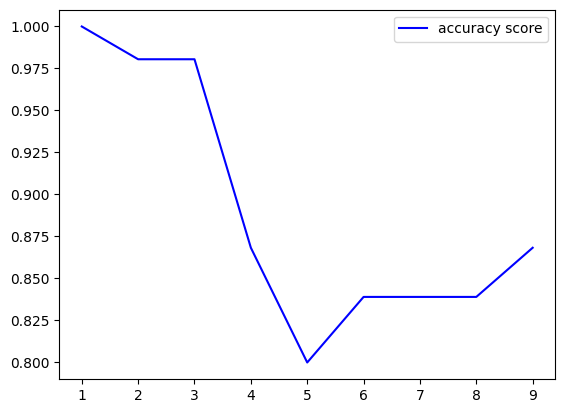

In [17]:
x=[1,2,3,4,5,6,7,8,9]

plt.plot(x,list,color='b',label='accuracy score')
plt.legend()
plt.show()
